In [1]:
##Small example
!pip install graphviz
!pip install --upgrade scikit-learn

  Using cached https://files.pythonhosted.org/packages/db/09/cab2f398e28e9f183714afde872b2ce23629f5833e467b151f18e1e08908/threadpoolctl-2.0.0-py3-none-any.whl
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


tpot 0.11.1 has requirement pandas>=0.24.2, but you'll have pandas 0.23.4 which is incompatible.


In [69]:
import shap
import xgboost as xgb
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
from Framework import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import openml
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\koral\\Documents\\release\\bin'
from sklearn.preprocessing import StandardScaler

In [79]:
X,y,name = datasets.returnDataset(0)
scaler = StandardScaler()
X = scaler.fit_transform(X)
#X.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)

In [90]:
old,_,_= datasets.returnDataset(0)

In [11]:
from sklearn.decomposition import PCA
#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
explained_var_ratio = 0
k = 1
while explained_var_ratio < 0.95:
    k += 1
    try:
        pca = PCA(n_components = k)
    except:
        pca = PCA(n_components = 1)  
    pca.fit(X)
    explained_var_ratio = pca.explained_variance_ratio_.sum()
print(k)
print(pca.explained_variance_ratio_)

2
[0.92986706 0.05763147]


In [8]:
for k in range(13,14):
    X,y,name = datasets.returnDataset(k)
    try:
        pca = PCA(n_components = 3)
        #pca.fit(X)
    except:
        pca = PCA(n_components = 1)
    pca.fit(X)
    print('Dataset : ',name , ' Variance_ratio : ', pca.explained_variance_ratio_.sum())

Dataset :  Banking Data  Variance_ratio :  0.5848627337062922


In [11]:
tsne.kl_divergence_

0.9018486738204956

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

In [81]:

params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss",
    "max_depth" : 3
}
model = xgb.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.588146
Will train until test-logloss hasn't improved in 20 rounds.
[100]	test-logloss:0.556859
[200]	test-logloss:0.549936
[300]	test-logloss:0.548217
[400]	test-logloss:0.54777
[500]	test-logloss:0.547602
Stopping. Best iteration:
[527]	test-logloss:0.547569



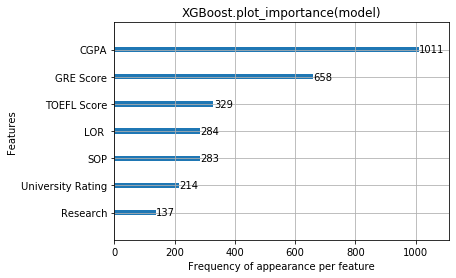

In [14]:
xgb.plot_importance(model,xlabel='Frequency of appearance per feature')
pl.title("XGBoost.plot_importance(model)")
pl.show()

In [82]:
back_ind = np.random.randint(0,len(X),1000)
background = X[back_ind,:]
explainer = shap.TreeExplainer(model, data = background,feature_dependence="independent", model_output='probability')
shap_values = explainer.shap_values(X)

 99%|===================| 493/500 [00:40<00:00]        

In [ ]:
shap_df = pd.DataFrame(shap_values,columns = X.columns)
shap_train, shap_test, y_train, y_test = train_test_split(shap_df, y, test_size=0.2, random_state=7)
d_train = xgb.DMatrix(shap_train, label=y_train)
d_test = xgb.DMatrix(shap_test, label=y_test)
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss",
    "max_depth" : 3
}
model_shap= xgb.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

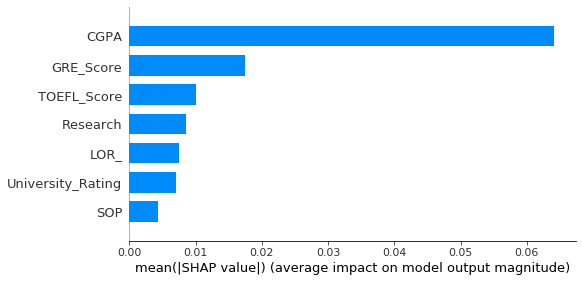

In [46]:
shap.summary_plot(shap_values, X, plot_type="bar")

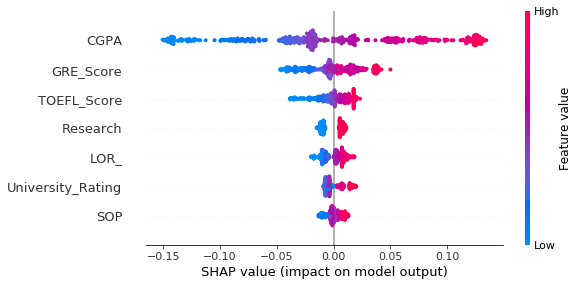

In [47]:
shap.summary_plot(shap_values, X)

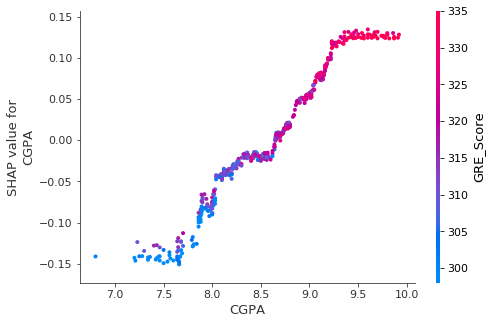

In [48]:
shap.dependence_plot('CGPA', shap_values, X, display_features=X)

In [83]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
explained_var_ratio = 0
k = 1
while explained_var_ratio < 0.95:
    k += 1
    try:
        pca = PCA(n_components = k)
    except:
        pca = PCA(n_components = 1)  
    pca.fit(X)
    explained_var_ratio = pca.explained_variance_ratio_.sum()
pca2 = pca.transform(X)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.predict(X)
#plt.scatter(pca2[:,0],pca2[:,1],labels)
#plt.scatter(X['CGPA'][:1000],y[:1000],c = labels[:1000])
#plt.legend()

In [84]:
explained_var_ratio = 0
k = 1
while explained_var_ratio < 0.95:
    k += 1
    try:
        pca = PCA(n_components = k)
    except:
        pca = PCA(n_components = 1)  
    pca.fit(shap_values)
    explained_var_ratio = pca.explained_variance_ratio_.sum()
pca3 = pca.transform(shap_values)
kmeans = KMeans(n_clusters=3, random_state=0).fit(shap_values)
labels_shap = kmeans.predict(shap_values)
#plt.scatter(pca3[:,0],pca3[:,1],labels_shap)
#plt.scatter(X['CGPA'][:1000],y[:1000],c = labels_shap[:1000])

In [85]:
from sklearn.metrics import silhouette_score
silhouette_org = silhouette_score(X,labels)
silhouette_shap = silhouette_score(shap_values,labels_shap)
print('Silhouette score of original cluster : {} Silhouette score of Shapley cluster {}'.format(silhouette_org,silhouette_shap))

Silhouette score of original cluster : 0.2708483721309707 Silhouette score of Shapley cluster 0.550953452259656


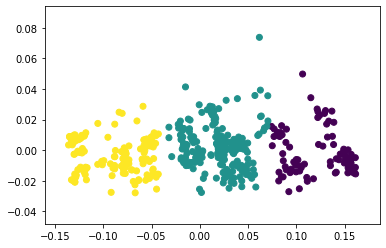

In [86]:
plt.scatter(pca3[:,0],pca3[:,1],c = labels_shap)

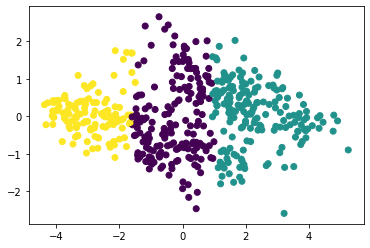

In [87]:
plt.scatter(pca2[:,0],pca2[:,1],c=labels)

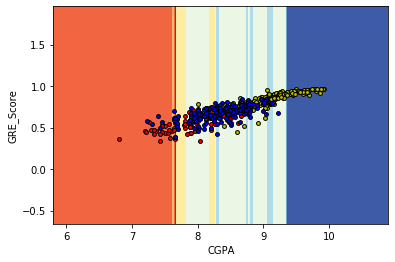

In [254]:
from sklearn.tree import DecisionTreeClassifier
# We only take the two corresponding features
X_plt = X.loc[:,['CGPA','GRE_Score']]
y_plt = labels
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
# Train
clf = DecisionTreeRegressor().fit(X_plt, y)
x_min, x_max = X_plt.iloc[:, 0].min() - 1, X_plt.iloc[:, 0].max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
plt.xlabel('CGPA')
plt.ylabel('GRE_Score')

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_plt == i)
    plt.scatter(X.iloc[idx]['CGPA'], y[idx], c=color, label='Class {}'.format(i),
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
#plt.legend()

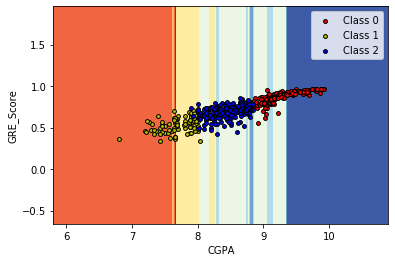

In [255]:
from sklearn.tree import DecisionTreeClassifier
# We only take the two corresponding features
X_plt = X.loc[:,['CGPA','GRE_Score']]
y_plt = labels_shap
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
# Train
clf = DecisionTreeRegressor().fit(X_plt, y)
x_min, x_max = X_plt.iloc[:, 0].min() - 1, X_plt.iloc[:, 0].max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
plt.xlabel('CGPA')
plt.ylabel('GRE_Score')

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_plt == i)
    plt.scatter(X.iloc[idx]['CGPA'], y[idx], c=color, label='Class {}'.format(i),
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
plt.legend()

In [88]:
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
cdict1 = {
    'red': ((0.0, 0.11764705882352941, 0.11764705882352941),
            (1.0, 0.9607843137254902, 0.9607843137254902)),

    'green': ((0.0, 0.5333333333333333, 0.5333333333333333),
              (1.0, 0.15294117647058825, 0.15294117647058825)),

    'blue': ((0.0, 0.8980392156862745, 0.8980392156862745),
             (1.0, 0.3411764705882353, 0.3411764705882353)),

    'alpha': ((0.0, 1, 1),
              (0.5, 1, 1),
              (1.0, 1, 1))
}  # #1E88E5 -> #ff0052
red_blue_solid = LinearSegmentedColormap('RedBlue', cdict1)

In [89]:
f = pl.figure(figsize=(5,5),frameon = False)
colors = ['blue','purple','red']
for i in np.unique(labels):
    idx = labels == i
    pl.scatter(X['CGPA'][idx],
               y[idx],
               color = colors[i],
               #explainer.expected_value + shap_values[:2000,:].sum(1).astype(np.float64),
               linewidth=0, alpha=1., cmap=red_blue_solid,label = 'Cluster {}'.format(i+1))
#cb = pl.colorbar(label="Cluster labels", aspect=40, orientation="horizontal" , ticks = np.arange(3))
#cb.set_alpha(1)
#cb.draw_all()
#cb.outline.set_linewidth(0)
#cb.ax.tick_params('x', length=0)
#cb.ax.yaxis.set_label_position('right')
#pl.gca().axis("off")
#pl.gca().axes.get_yaxis().set_visible(False)
pl.xlabel("CGPA of Student")
pl.ylabel("Probability of admission")
pl.legend()
pl.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 360x360 with 0 Axes>

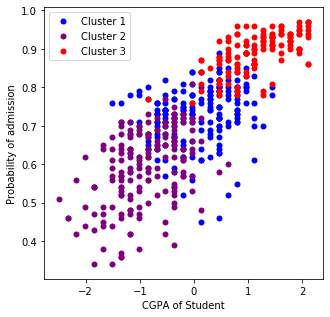

In [92]:
X_df = pd.DataFrame(X,columns = old.columns)
f = pl.figure(figsize=(5,5),frameon = False)
colors = ['blue','purple','red']
for i in np.unique(labels_shap):
    idx = labels == i
    pl.scatter(X_df['TOEFL Score'][idx],
               y[idx],
               color = colors[i],
               #explainer.expected_value + shap_values[:2000,:].sum(1).astype(np.float64),
               linewidth=0, alpha=1., cmap=red_blue_solid,label = 'Cluster {}'.format(i+1))
#cb = pl.colorbar(label="Cluster labels", aspect=40, orientation="horizontal" , ticks = np.arange(3))
#cb.set_alpha(1)
#cb.draw_all()
#cb.outline.set_linewidth(0)
#cb.ax.tick_params('x', length=0)
#cb.ax.yaxis.set_label_position('right')
#pl.gca().axis("off")
#pl.gca().axes.get_yaxis().set_visible(False)
pl.xlabel("CGPA of Student")
pl.ylabel("Probability of admission")
pl.legend()
pl.show()

In [36]:
f = pl.figure(figsize=(5,5))
pl.scatter(pca2[:,0],
           pca2[:,1],
           c=pca2.sum(1).astype(np.float64),
           linewidth=0, alpha=1., cmap=red_blue_solid)
cb = pl.colorbar(label="Log odds of making > $50K", aspect=40, orientation="horizontal")
cb.set_alpha(1)
cb.draw_all()
cb.outline.set_linewidth(0)
cb.ax.tick_params('x', length=0)
cb.ax.xaxis.set_label_position('top')
pl.gca().axis("off")
pl.show()

NameError: name 'pca2' is not defined

<Figure size 360x360 with 0 Axes>

In [ ]:
xgb.plot_tree(model,num_trees=0, rankdir='TB')
fig = plt.gcf()
fig.set_size_inches(150, 100)

In [ ]:
xgb.plot_tree(model_shap,num_trees=0, rankdir='TB')
fig = plt.gcf()
fig.set_size_inches(150, 100)

In [ ]:
model.trees_to_dataframe()

In [260]:
X.iloc[0]

GRE_Score            337.00
TOEFL_Score          118.00
University_Rating      4.00
SOP                    4.50
LOR_                   4.50
CGPA                   9.65
Research               1.00
Name: 0, dtype: float64

In [263]:
shap_values[8]

array([-0.0320663 , -0.01065733, -0.00424384, -0.0114007 , -0.01689759,
       -0.09022203, -0.00879479])

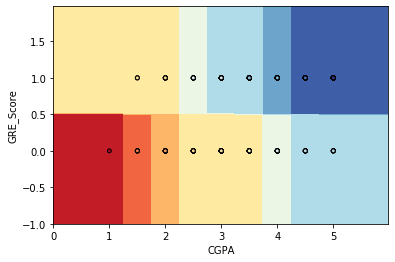

In [125]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
dtree=DecisionTreeRegressor()
dtree.fit(X,y)
# We only take the two corresponding features
X_plt = X.loc[:,['LOR_','Research']]
y_plt = y
n_classes = 1
plot_colors = "ryb"
plot_step = 0.02
# Train
clf = DecisionTreeRegressor().fit(X_plt, y_plt)
x_min, x_max = X_plt.iloc[:, 0].min() - 1, X_plt.iloc[:, 0].max() + 1
y_min, y_max = X_plt.iloc[:, 1].min() - 1, X_plt.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
plt.xlabel('CGPA')
plt.ylabel('GRE_Score')
# Plot the training points
labels = clf.predict(X_plt)
plt.scatter(X_plt.iloc[:, 0], X_plt.iloc[:, 1], c=labels, label='Admission Probability',
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

In [117]:
clf.predict(X_plt)

array([0.92      , 0.78      , 0.72      , 0.8       , 0.65      ,
       0.9       , 0.75      , 0.68      , 0.5       , 0.45      ,
       0.61      , 0.84      , 0.78      , 0.62      , 0.61      ,
       0.54      , 0.66      , 0.65      , 0.63      , 0.62      ,
       0.6       , 0.61      , 0.94      , 0.95      , 0.97      ,
       0.92      , 0.76      , 0.44      , 0.46      , 0.54      ,
       0.65      , 0.74      , 0.91      , 0.92      , 0.94      ,
       0.88      , 0.64      , 0.58      , 0.52      , 0.48      ,
       0.46      , 0.49      , 0.53      , 0.87      , 0.91      ,
       0.88      , 0.86      , 0.89      , 0.82      , 0.78      ,
       0.76      , 0.6       , 0.78      , 0.72      , 0.7       ,
       0.64      , 0.64      , 0.46      , 0.36      , 0.42      ,
       0.48      , 0.47      , 0.54      , 0.56      , 0.52      ,
       0.55      , 0.61      , 0.57      , 0.68      , 0.78      ,
       0.94      , 0.96      , 0.93      , 0.84      , 0.74   

In [293]:
shap.force_plot(explainer.expected_value,shap_values[152,:],X.iloc[152,:])

In [290]:
np.where(y == 0.86)

(array([ 46,  97, 152, 172, 192, 237, 297, 365, 432, 469], dtype=int64),)

In [61]:
shap.force_plot(explainer.expected_value,shap_values[2,:],X.iloc[2,:])

In [281]:
X.iloc[147]

GRE_Score            326.00
TOEFL_Score          114.00
University_Rating      3.00
SOP                    3.00
LOR_                   3.00
CGPA                   9.11
Research               1.00
Name: 147, dtype: float64

In [88]:
X.iloc[14]

GRE_Score            311.0
TOEFL_Score          104.0
University_Rating      3.0
SOP                    3.5
LOR_                   2.0
CGPA                   8.2
Research               1.0
Name: 14, dtype: float64

In [296]:
y[147]

0.83

In [295]:
shap_values[147]

array([ 0.00653681,  0.0142064 , -0.00495085, -0.00294012, -0.00493062,
        0.0759937 ,  0.00856577])

In [68]:
from scipy.spatial import distance
distance.euclidean(X, X)

ValueError: Input vector should be 1-D.

In [66]:
from scipy.spatial import distance
distance.correlation(shap_values, shap_values)

0.05995471940020014

In [67]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(np.array(X.iloc[2]).reshape(1,-1),np.array(X.iloc[13]).reshape(1,-1))
print('Cosine similarity: %.3f' % cos_sim)

Cosine similarity: 1.000


In [82]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(np.array(shap_values[2]).reshape(1,-1),np.array(shap_values[13]).reshape(1,-1))
print('Cosine similarity: %.3f' % cos_sim)

Cosine similarity: 0.950


In [64]:
!pip install --upgrade pyclustertend

Requirement already up-to-date: pyclustertend in c:\users\koral\anaconda3\lib\site-packages (1.4.0)


In [63]:
from pyclustertend import hopkins

ImportError: cannot import name 'calinski_harabaz_score' from 'sklearn.metrics' (C:\Users\koral\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [300]:
from sklearn.preprocessing import scale

In [319]:
X_scale = scale(X)

In [320]:
shap_values_scale = scale(shap_values)

In [62]:
from pyclustertend import vat

ImportError: cannot import name 'calinski_harabaz_score' from 'sklearn.metrics' (C:\Users\koral\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

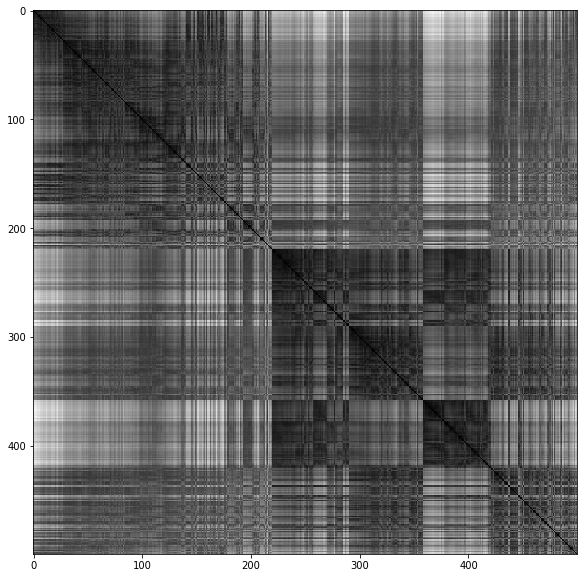

In [340]:
odm = ivat(X_scale,True)

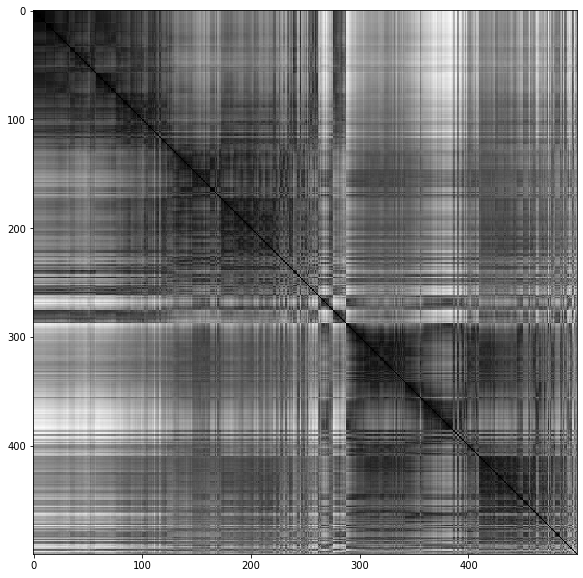

In [341]:
odm_shap = vat(shap_values_scale,True)

In [346]:
hopkins(X_scale,len(X_scale)//5)

0.24847374450405807

In [347]:
hopkins(shap_values_scale,len(shap_values_scale)//5)

0.23046773693780254

In [342]:
odm

array([[0.        , 1.0087229 , 1.28434542, ..., 5.57636866, 3.2853218 ,
        2.75410658],
       [1.0087229 , 0.        , 0.78459991, ..., 5.3582181 , 3.04885521,
        2.76886302],
       [1.28434542, 0.78459991, 0.        , ..., 5.56577886, 2.91050516,
        3.0468333 ],
       ...,
       [5.57636866, 5.3582181 , 5.56577886, ..., 0.        , 5.05595222,
        3.42992542],
       [3.2853218 , 3.04885521, 2.91050516, ..., 5.05595222, 0.        ,
        3.08464928],
       [2.75410658, 2.76886302, 3.0468333 , ..., 3.42992542, 3.08464928,
        0.        ]])

In [343]:
odm_shap

array([[0.        , 0.74482701, 0.80249389, ..., 7.62734296, 5.68721569,
        5.17301129],
       [0.74482701, 0.        , 0.0596613 , ..., 7.53423864, 5.5984884 ,
        5.16201463],
       [0.80249389, 0.0596613 , 0.        , ..., 7.52158654, 5.59023776,
        5.15627691],
       ...,
       [7.62734296, 7.53423864, 7.52158654, ..., 0.        , 3.34158844,
        5.77021074],
       [5.68721569, 5.5984884 , 5.59023776, ..., 3.34158844, 0.        ,
        4.57752539],
       [5.17301129, 5.16201463, 5.15627691, ..., 5.77021074, 4.57752539,
        0.        ]])